# K-means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
%matplotlib inline

## Implementing K-means

### 1.1 Finding closest centroids

In [3]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memeberships for every examples

    Args:
        X (ndarray): (m,n) Input values
        centroids (ndarray): k centroids

    Returns:
        idx (array_like): (m,) closest centroids
    """

    K=centroids.shape[0]
    idx=np.zeros(X.shape[0],dtype=int)

    for i in range(X.shape[0]):
        distance=[]
        for j in range(K):
            norm_ij=np.linalg.norm(X[i]-centroids[j])
            distance.append(norm_ij)
        idx[i]=np.argmin(distance)

    return idx

In [5]:
X=load_data()

In [6]:
X

array([[ 1.84207953,  4.6075716 ],
       [ 5.65858312,  4.79996405],
       [ 6.35257892,  3.2908545 ],
       [ 2.90401653,  4.61220411],
       [ 3.23197916,  4.93989405],
       [ 1.24792268,  4.93267846],
       [ 1.97619886,  4.43489674],
       [ 2.23454135,  5.05547168],
       [ 2.98340757,  4.84046406],
       [ 2.97970391,  4.80671081],
       [ 2.11496411,  5.37373587],
       [ 2.12169543,  5.20854212],
       [ 1.5143529 ,  4.77003303],
       [ 2.16979227,  5.27435354],
       [ 0.41852373,  4.88312522],
       [ 2.47053695,  4.80418944],
       [ 4.06069132,  4.99503862],
       [ 3.00708934,  4.67897758],
       [ 0.66632346,  4.87187949],
       [ 3.1621865 ,  4.83658301],
       [ 0.51155258,  4.91052923],
       [ 3.1342801 ,  4.96178114],
       [ 2.04974595,  5.6241395 ],
       [ 0.66582785,  5.24399257],
       [ 1.01732013,  4.84473647],
       [ 2.17893568,  5.29758701],
       [ 2.85962615,  5.26041997],
       [ 1.30882588,  5.30158701],
       [ 0.99253246,

In [7]:
print("First five elements of X are:\n", X[:5]) 
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


In [8]:
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])

First three elements in idx are: [0 2 1]


In [9]:
from public_tests import *

find_closest_centroids_test(find_closest_centroids)

All tests passed!


### 1.2 Computing centroid means

In [10]:
def compute_centroids(X,idx,K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """

    m,n=X.shape

    centroids=np.zeros((K,n))

    for k in range(K):
        points=X[idx==k]
        centroids[k]=np.mean(points,axis=0)
    return centroids

In [11]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)

# UNIT TEST
compute_centroids_test(compute_centroids)

The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]
All tests passed!


## 2- K-means on a sample dataset

In [12]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    
    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


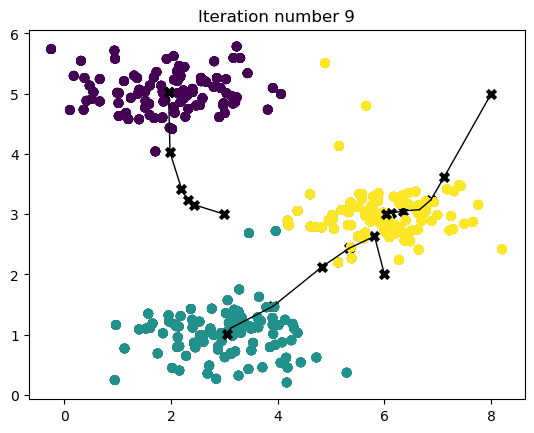

In [13]:
initial_centroids = np.array([[3,3],[6,2],[8,5]])
K = 3
max_iters=10
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

## 3 - Random initilization

In [14]:
# You do not need to modify this part

def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


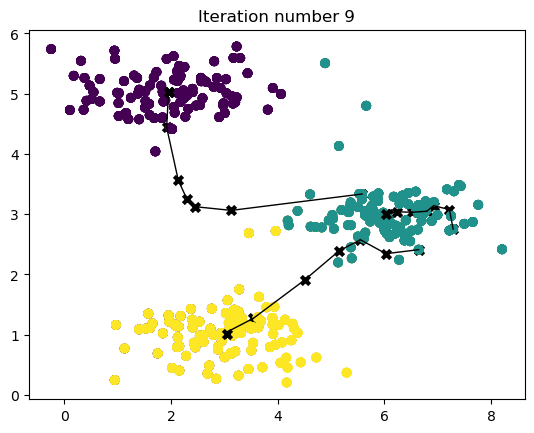

In [27]:
centroids, idx = run_kMeans(X, kMeans_init_centroids(X,3), max_iters, plot_progress=True)

## 4 - Image compression with K-means

In [28]:
original_img=plt.imread("bird_small.png")

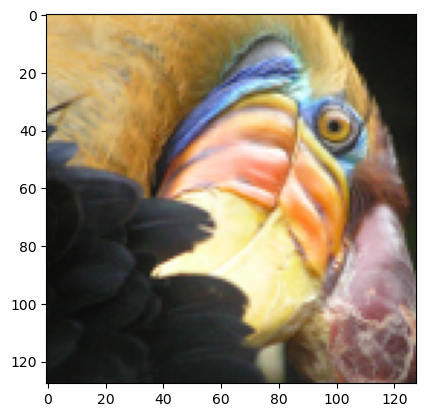

In [29]:
plt.imshow(original_img)

In [30]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (128, 128, 3)


In [31]:
original_img[50, 33, 2]

0.19607843

In [33]:
original_img[50, 0, 2]

0.30980393

In [34]:
original_img = original_img / 255

In [35]:
original_img[50, 33, 2]
original_img[50, 100, 2]
original_img[50, 0, 2]

0.000768935

0.0022914265

0.0012149174

In [36]:
original_img.shape[0] * original_img.shape[1]

16384

In [37]:
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [38]:
X_img

array([[0.00336794, 0.00276817, 0.00158401],
       [0.0035371 , 0.00284506, 0.00178393],
       [0.00347559, 0.00286044, 0.00169166],
       ...,
       [0.00099962, 0.00066128, 0.00059977],
       [0.00089196, 0.00056901, 0.00058439],
       [0.00079969, 0.00059977, 0.00052288]], dtype=float32)

In [39]:
X_img.shape

(16384, 3)

In [40]:
# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 16                       
max_iters = 10               

# Using the function you have implemented above. 
initial_centroids = kMeans_init_centroids(X_img, K) 

# Run K-Means - this takes a couple of minutes
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters) 

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [41]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [9 9 9 9 9]


In [48]:
idx

array([9, 9, 9, ..., 0, 0, 0])

In [42]:
# Represent image in terms of indices
X_recovered = centroids[idx, :] 

In [47]:
centroids.shape

(16, 3)

In [46]:
X_recovered.shape

(16384, 3)

In [49]:
X_recovered = np.reshape(X_recovered, original_img.shape) 

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Original')

Text(0.5, 1.0, 'Compressed with 16 colours')

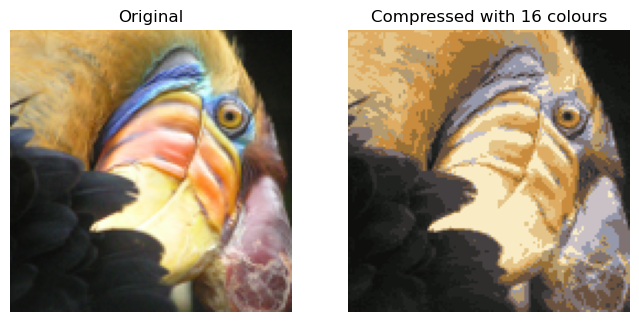

In [50]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()